In [3]:
import os
import random
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
dat_path = r"C:\Users\hp\OneDrive\Documents\projects\Histopathology-Image-Classification\raw_data\Kather_texture_2016_image_tiles_5000\pictures"
os.listdir(dat_path)

['01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '04_LYMPHO',
 '05_DEBRIS',
 '06_MUCOSA',
 '07_ADIPOSE',
 '08_EMPTY']

In [ ]:
classes = dat_path

In [6]:
classes

['01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '04_LYMPHO',
 '05_DEBRIS',
 '06_MUCOSA',
 '07_ADIPOSE',
 '08_EMPTY']

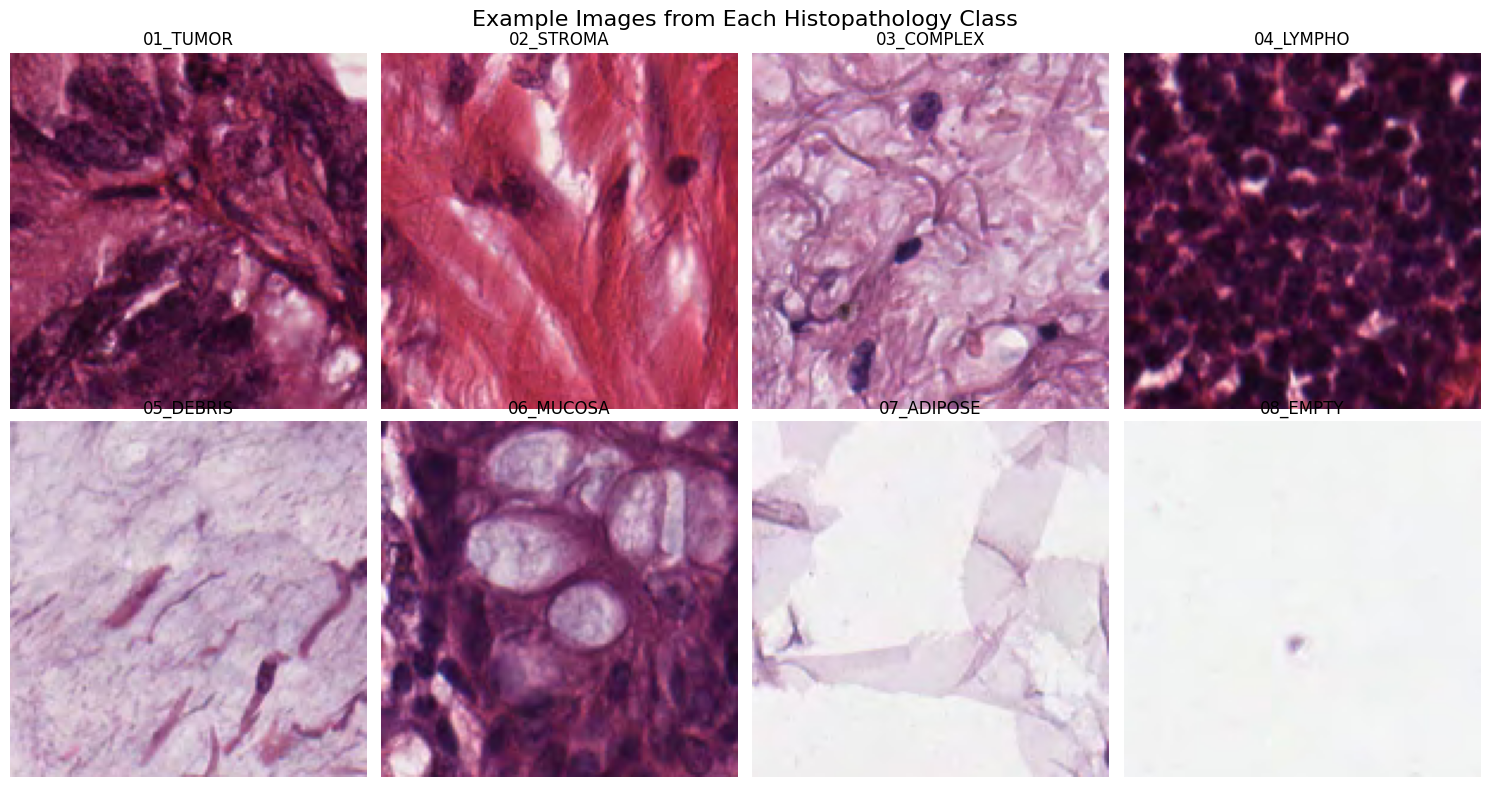

In [7]:
#show 1 image per class
import matplotlib.image as mpimg
plt.figure(figsize=(15, 8))


for idx, tissue_class in enumerate(classes):
    class_folder = os.path.join(dat_path, tissue_class)
    image_name = random.choice(os.listdir(class_folder))  # Pick random image
    image_path = os.path.join(class_folder, image_name)

    img = mpimg.imread(image_path)

    plt.subplot(2, 4, idx + 1)
    plt.imshow(img)
    plt.title(tissue_class)
    plt.axis("off")

plt.suptitle("Example Images from Each Histopathology Class", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: image preprocessing
# Loading and resizing all images
IMG_SIZE = 64  # resizing all images to 60x60
X = []         # Features (the images)
y = []         # Labels (the tissue types)

for label_idx, class_name in enumerate(classes):
    class_folder = os.path.join(dat_path, class_name)
    for image_file in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_file)
        img = cv2.imread(image_path)                # Load image as numbers
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # Resize to 60x60
        X.append(img)                               # Image pixels (numbers)
        y.append(label_idx)  # Stored class index instead of name (like 0,1,2...)

In [9]:
# Converting to NumPy Arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [10]:
# Normalization(Feature Scaling: MinMaxScaler Manually)
X = X / 255.0  # Normalize the image pixel values to be between 0 and 1
# Spliting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35, stratify=y)


In [11]:
# Encoding(One-hot encoding method)
y_train = to_categorical(y_train, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)

In [12]:
X_train.shape     

(4000, 64, 64, 3)

In [13]:
y_train.shape   
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0.])

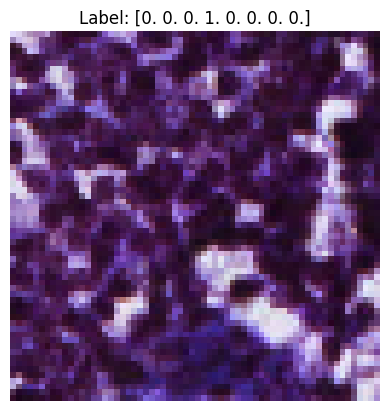

In [14]:
# Visualizing using matplotlib
plt.imshow(X_train[0])             # Displays the image visually
plt.title(f"Label: {y_train[0]}")  # y_train to show the image
plt.axis('off')
plt.show()

In [15]:
# Naming numerical labels manually
class_names = {
    0: "TUMOR",
    1: "STROMA",
    2: "COMPLEX",
    3: "LYMPHO",
    4: "DEBRIS",
    5: "MUCOSA",
    6: "ADIPOSE",
    7: "EMPTY"
}


In [16]:
# Step 2: Definition and Building the CNN Model
model = Sequential()

# 1st Convolutional Block to Detect Basic Features
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block to Detect Deeper Features
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Block for Deeper Insights
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling(lightweight)
model.add(GlobalAveragePooling2D())


# Dense Layers
model.add(Dropout(0.4))  # To reduce overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # To reduce overfitting
model.add(Dense(8, activation='softmax'))  # 8 classes

c:\Users\hp\OneDrive\Documents\projects\Histopathology-Image-Classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Step 3: Compiling the CNN Model to decide how it learn
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,688 (436.28 KB)

 Trainable params: 111,240 (434.53 KB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
# Step 4: Augmentation (Feeding images into the CNN Model using ImageDataGenerator)
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

In [20]:
# Learning from training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_test, y_test, batch_size=32)

In [21]:
# Step 5: Training the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=14
)

c:\Users\hp\OneDrive\Documents\projects\Histopathology-Image-Classification\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/14
125/125 ━━━━━━━━━━━━━━━━━━━━ 79s 419ms/step - accuracy: 0.4696 - loss: 1.4351 - val_accuracy: 0.1400 - val_loss: 2.4653
Epoch 2/14
125/125 ━━━━━━━━━━━━━━━━━━━━ 56s 449ms/step - accuracy: 0.6657 - loss: 0.8358 - val_accuracy: 0.2520 - val_loss: 2.7910
Epoch 3/14
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 390ms/step - accuracy: 0.7044 - loss: 0.7638 - val_accuracy: 0.4540 - val_loss: 2.3821
Epoch 4/14
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 347ms/step - accuracy: 0.7214 - loss: 0.6941 - val_accuracy: 0.4180 - val_loss: 1.9651
Epoch 5/14
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 361ms/step - accuracy: 0.7536 - loss: 0.6361 - val_accuracy: 0.5540 - val_loss: 1.6316
Epoch 6/14
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 342ms/step - accuracy: 0.7548 - loss: 0.6299 - val_accuracy: 0.6180 - val_loss: 1.1686
Epoch 7/14
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 329ms/step - accuracy: 0.7805 - loss: 0.5738 - val_accuracy: 0.6440 - val_loss: 0.9466
Epoch 8/14
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - accuracy: 0.7981 - loss: 0

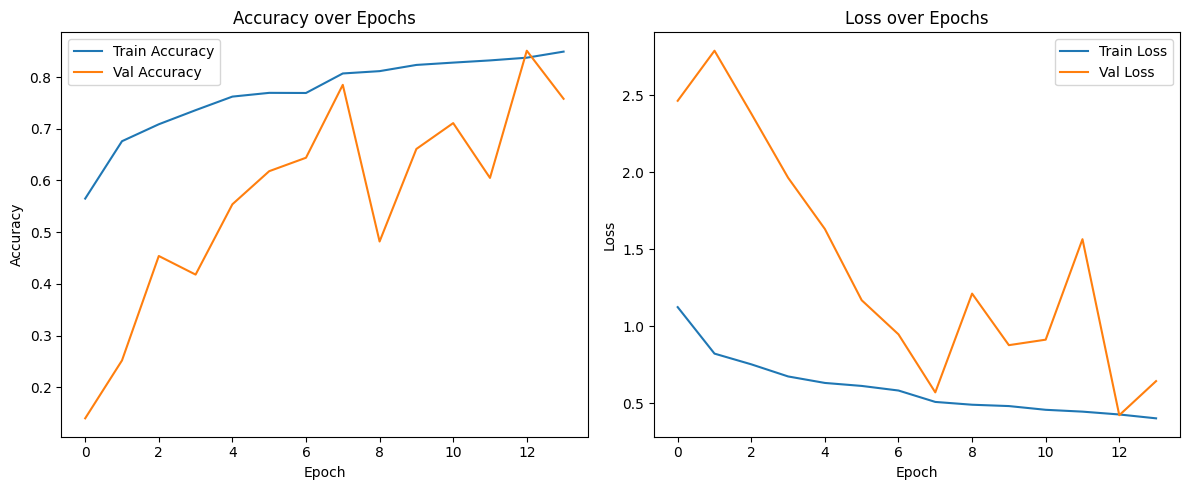

In [22]:
# Step 6: Plotting the Training history to evaluate model(trained) performance

# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Step 7: Evaluation of Model on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")
print("Test Loss:", round(test_loss, 4))

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.7705 - loss: 0.6214
Test Accuracy: 75.8 %
Test Loss: 0.6426


In [24]:
# Step 8: Predicting the Test Data
# Predict class probabilities
y_pred_probs = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


In [25]:
y_pred = np.argmax(y_pred_probs, axis=1) # predicted class indices

In [26]:
y_true = y_test

In [27]:
y_true = np.argmax(y_pred_probs, axis=1)

In [28]:
y_test.shape

(1000, 8)

In [29]:
y_pred.shape

(1000,)

In [30]:
# Step 9: Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print(classification_report(y_true, y_pred, target_names=list(class_names.values())))


              precision    recall  f1-score   support

       TUMOR       1.00      1.00      1.00       124
      STROMA       1.00      1.00      1.00        59
     COMPLEX       1.00      1.00      1.00       169
      LYMPHO       1.00      1.00      1.00       142
      DEBRIS       1.00      1.00      1.00       225
      MUCOSA       1.00      1.00      1.00        55
     ADIPOSE       1.00      1.00      1.00       118
       EMPTY       1.00      1.00      1.00       108

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



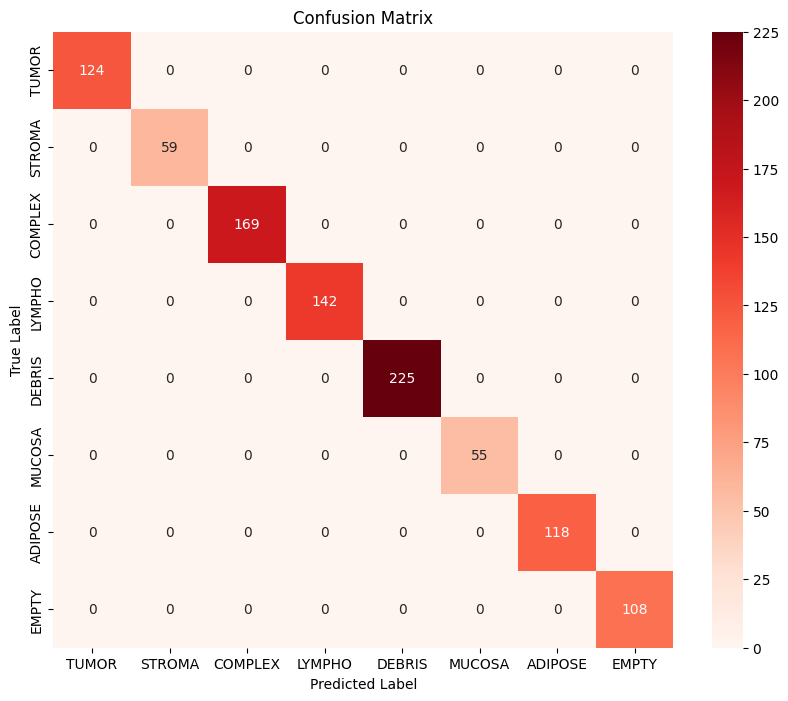

In [32]:
# Plotting Confusion Matrix using Seaborn
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Saving Model
model.save("histopathology_classifier_model.h5")

In [34]:
# Loading model
from tensorflow.keras.models import load_model
model = load_model("histopathology_classifier_model.h5")


In [35]:
# Predicting on a new image
IMG_SIZE = 64
image_path = r"C:\Users\hp\OneDrive\Pictures\h&e benign colorectal tissue.jpg"
def prepare_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0                  # Normalize(Scaling)
    img = np.expand_dims(img, axis=0)  
    return img

In [36]:
# Predicting and Decoding
prepared_image = prepare_image(image_path)

# Predict
prediction = model.predict(prepared_image)
predicted_class = np.argmax(prediction)

# Decode to class names
tissue_classes = class_names

print("Predicted Class:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
Predicted Class: TUMOR
